# Integrals

Let's approximate the integral of a function using numerical methods.

## Trapezoidal Rule

At first our necessary libs,

In [38]:
import numpy as np
import matplotlib.pyplot as plt

Let's define a sample function to integrate.

In [39]:
def fun(x):
  return 0.2 + 25 * x - 200 * x**2 + 675 * x**3 - 900 * x**4 + 400 * x**5

Let's plot it!

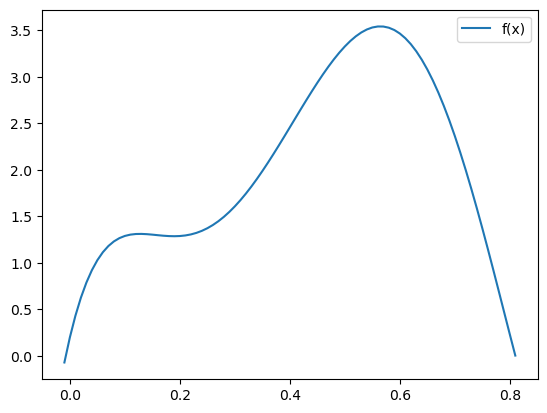

In [134]:
array = np.arange(-0.01, 0.82, 0.01)
plt.plot(array, fun(array), label='f(x)')
plt.legend()

Let's define our Trapezoidal Rule!

In [41]:
def trapezoidal_rule(fun, a, b):
  return (b - a) * (fun(a) + fun(b)) / 2

Our trapezoidal rule function is ready to use!

0.1728000000000225


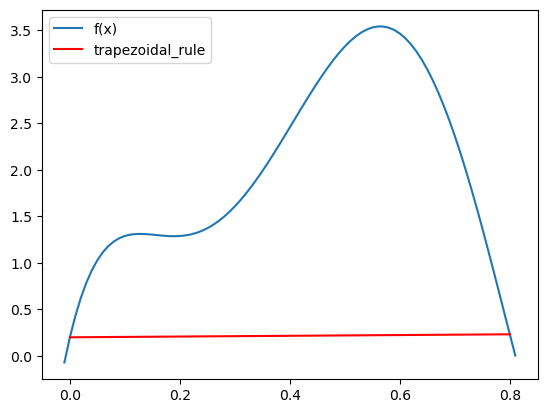

In [135]:
print(trapezoidal_rule(fun, 0, 0.8))
plt.plot(array, fun(array), label='f(x)')
plt.plot([0, 0.8], [fun(0), fun(0.8)], color='red', label='trapezoidal_rule')
plt.legend()

## Simspon's 1/3 Rule

Let's implement it,

In [43]:
def simpsons_1_3_rule(fun, a, b):
    return (b - a) / 6 * (fun(a) + 4 * fun((a + b) / 2) + fun(b))

Let's plot it,

1.3674666666666742


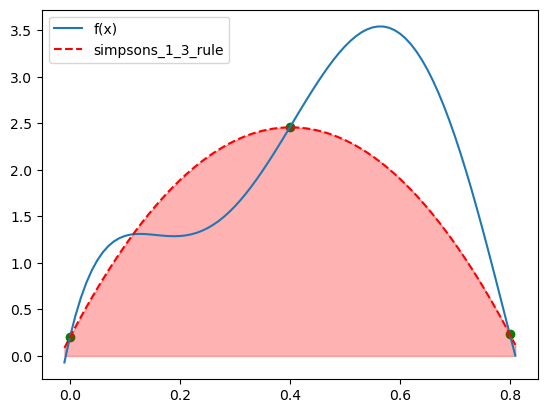

In [98]:
from scipy.interpolate import CubicSpline

print(simpsons_1_3_rule(fun, 0, 0.8))

plt.plot(array, fun(array), label="f(x)")
plt.scatter([0, 0.4, 0.8], [fun(0), fun(0.4), fun(0.8)], color='green')
plt.plot(array, CubicSpline([0, 0.4, 0.8], [fun(0), fun(0.4), fun(0.8)])(array), '--', color='red', label='simpsons_1_3_rule')
plt.fill_between(array, CubicSpline([0, 0.4, 0.8], [fun(0), fun(0.4), fun(0.8)])(array), color='red', alpha=0.3)
plt.legend()

## Simpson's 3/8 Rule

In [67]:
def simpsons_3_8_rule(fun, a, b):
    a, b = min(a, b), max(a, b)
    h = (b - a) / 3
    return (3 * h / 8) * (fun(a) + 3 * fun(a + h) + 3 * fun(a + 2 * h) + fun(b))

Let's plot it,

1.519170370370378


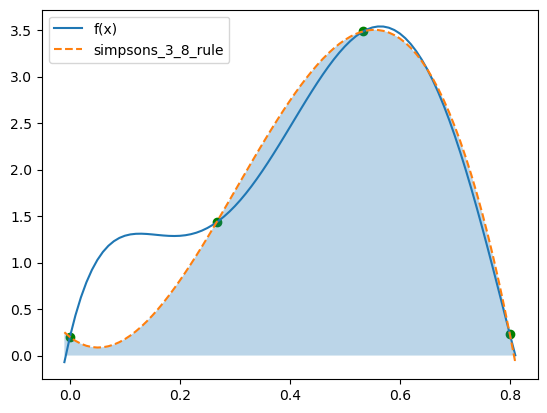

In [103]:
from scipy.interpolate import CubicSpline

a, b, c, d = 0, 0.8/3, 0.8/3*2, 0.8
print(simpsons_3_8_rule(fun, a, d))

plt.plot(array, fun(array), label="f(x)")
plt.plot(array, CubicSpline([a, b, c, d], [fun(a), fun(b), fun(c), fun(d)])(array), '--', label="simpsons_3_8_rule")
plt.scatter([a, b, c, d], [fun(a), fun(b), fun(c), fun(d)], color='green')
plt.fill_between(array, CubicSpline([a, b, c, d], [fun(a), fun(b), fun(c), fun(d)])(array), alpha=0.3)

plt.legend()

Let's plot all of them altogether,

Trapezoidal rule   ->  0.1728000000000225
Simpson's 1/3 rule ->  1.3674666666666742
Simpson's 3/8 rule ->  1.519170370370378


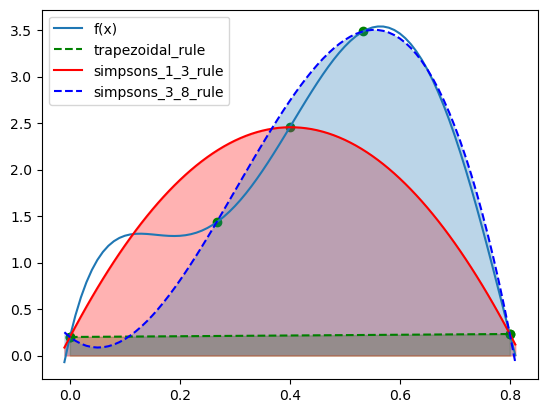

In [132]:
# Main function
plt.plot(array, fun(array), label="f(x)")

# Trapezoidal rule
print("Trapezoidal rule   -> ", trapezoidal_rule(fun, 0, 0.8))
plt.plot([0, 0.8], [fun(0), fun(0.8)], '--', color='green', label='trapezoidal_rule')
plt.fill_between([0, 0.8], [fun(0), fun(0.8)], color='green', alpha=0.3)

# Simpson's 1/3 rule
print("Simpson's 1/3 rule -> ", simpsons_1_3_rule(fun, 0, 0.8))

plt.scatter([0, 0.4, 0.8], [fun(0), fun(0.4), fun(0.8)], color='green')
plt.plot(array, CubicSpline([0, 0.4, 0.8], [fun(0), fun(0.4), fun(0.8)])(array), color='red', label='simpsons_1_3_rule')
plt.fill_between(array, CubicSpline([0, 0.4, 0.8], [fun(0), fun(0.4), fun(0.8)])(array), color='red', alpha=0.3)

a, b, c, d = 0, 0.8/3, 0.8/3*2, 0.8

# Simpson's 3/8 rule
print("Simpson's 3/8 rule -> ", simpsons_3_8_rule(fun, a, d))

plt.scatter([a, b, c, d], [fun(a), fun(b), fun(c), fun(d)], color='green')

plt.plot(array, CubicSpline([a, b, c, d], [fun(a), fun(b), fun(c), fun(d)])(array), '--', color='blue', label="simpsons_3_8_rule")
plt.fill_between(array, CubicSpline([a, b, c, d], [fun(a), fun(b), fun(c), fun(d)])(array), alpha=0.3)

plt.legend()